<h1><img src="https://cdn.freebiesupply.com/images/large/2x/steam-logo-transparent.png" width=40 style="vertical-align: middle"> Steam Reviews 2021 Dataset Analysis</h1>

### Import libraries 

In [1]:
pip install textblob numpy matplotlib seaborn pandas swifter nltk

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import swifter

### Download the dataset from Kaggle

In [3]:
path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\flavi\.cache\kagglehub\datasets\najzeko\steam-reviews-2021\versions\1


# Step 1. **Exploratory Data Analysis (EDA)**

 #### Before diving deep into the dataset provided, it is crucial to understand its structure and main features. 

In [4]:
# Define a function to parse a timestamp in seconds to a datetime format
def dateparse(time_in_sec):
    return pd.to_datetime(time_in_sec, unit="s") # Convert time in seconds to datetime format

## Read file in format csv

In [5]:
df= pd.read_csv("steam_reviews.csv",index_col=0)

In [6]:
print(f"Dataset rows number: {df.shape[0]}\nDataset columns number: {df.shape[1]}") 

Dataset rows number: 21747371
Dataset columns number: 22


In [7]:
df.head() # visualize the first five values of each column

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [8]:
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

## Dataset Information

This dataset contains information about user reviews on the Steam gaming platform in 2021. Below is a brief description of each variable:

- **app_id**: Unique identifier for the application.
- **app_name**: Name of the application.
- **review_id**: Unique identifier for the review.
- **language**: Language in which the review is written.
- **review**: The text content of the review.
- **timestamp_created**: Date and time when the review was created.
- **timestamp_updated**: Date and time when the review was last updated.
- **recommended**: Indicates whether the reviewer recommends the application (e.g., yes/no).
- **votes_helpful**: Number of users who found the review helpful.
- **votes_funny**: Number of users who found the review funny.
- **weighted_vote_score**: A score reflecting the review's overall helpfulness, accounting for the reviewer's history.
- **comment_count**: Number of comments on the review.
- **steam_purchase**: Indicates if the game was purchased on Steam.
- **received_for_free**: Indicates if the reviewer received the game for free.
- **written_during_early_access**: Indicates if the review was written during the early access phase of the game.
- **author.steamid**: Unique identifier for the review author (user).
- **author.num_games_owned**: Number of games owned by the reviewer.
- **author.num_reviews**: Total number of reviews written by the reviewer.
- **author.playtime_forever**: Total playtime of all games owned by the reviewer.
- **author.playtime_last_two_weeks**: Total playtime of games owned by the reviewer in the last two weeks.
- **author.playtime_at_review**: Playtime of the game at the time the review was written.
- **author.last_played**: Date when the reviewer last played the game.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews            

In [10]:
# Define the columns which we'll apply the dateparse function 
date_columns = ["timestamp_created", "timestamp_updated", "author.last_played"]
df[date_columns]

,timestamp_created,timestamp_updated,author.last_played
0,1611381629,1611381629,1.611343e+09
1,1611381030,1611381030,1.611386e+09
2,1611380800,1611380800,1.611384e+09
3,1611379970,1611379970,1.611384e+09
4,1611379427,1611379427,1.610788e+09
...,...,...,...
21747371,1584986704,1584986704,1.586628e+09
21747372,1584986693,1584986693,1.611080e+09
21747373,1584986673,1584986673,1.591634e+09
21747374,1584986631,1586382422,1.589715e+09


In [11]:
# Apply dateparse function to specific datetime types column of Dataset
df[date_columns]= df[date_columns].apply(dateparse)
df[date_columns]

,timestamp_created,timestamp_updated,author.last_played
0,2021-01-23 06:00:29,2021-01-23 06:00:29,2021-01-22 19:23:03
1,2021-01-23 05:50:30,2021-01-23 05:50:30,2021-01-23 07:18:27
2,2021-01-23 05:46:40,2021-01-23 05:46:40,2021-01-23 06:36:17
3,2021-01-23 05:32:50,2021-01-23 05:32:50,2021-01-23 06:35:44
4,2021-01-23 05:23:47,2021-01-23 05:23:47,2021-01-16 09:10:49
...,...,...,...
21747371,2020-03-23 18:05:04,2020-03-23 18:05:04,2020-04-11 17:56:56
21747372,2020-03-23 18:04:53,2020-03-23 18:04:53,2021-01-19 18:17:11
21747373,2020-03-23 18:04:33,2020-03-23 18:04:33,2020-06-08 16:29:13
21747374,2020-03-23 18:03:51,2020-04-08 21:47:02,2020-05-17 11:36:55


## Optimizing Data Types 

### **Importance of Data Type Conversion**

Converting int64 to int32 and float64 to float32 reduces memory usage and speeds up computations. This optimization is crucial for handling large datasets efficiently, saving resources, and improving performance.

In [12]:
for column in df.columns:
    if df[column].dtype=='int64':
        df[column]=df[column].astype("int32")
    elif df[column].dtype=='float64':
        df[column]=df[column].astype("float32")
df.dtypes

app_id                                     int32
app_name                                  object
review_id                                  int32
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                 datetime64[ns]
recommended                                 bool
votes_helpful                              int32
votes_funny                                int32
weighted_vote_score                      float32
comment_count                              int32
steam_purchase                              bool
received_for_free                           bool
written_during_early_access                 bool
author.steamid                             int32
author.num_games_owned                     int32
author.num_reviews                         int32
author.playtime_forever                  float32
author.playtime_last_two_weeks           float32
author.playtime_at_r

## Data cleaning process

#### Removing null values is indeed an essential step in data cleaning, as it helps to improve the quality and reliability of the analysis. Null values can cause inaccurate results, errors in calculations, and biased insights.

In [13]:
# Count na values for each column
print(df.isnull().sum())

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64


In [14]:
# clear the dataset from 
df=df.dropna()
print(df.isnull().sum())

app_id                            0
app_name                          0
review_id                         0
language                          0
review                            0
timestamp_created                 0
timestamp_updated                 0
recommended                       0
votes_helpful                     0
votes_funny                       0
weighted_vote_score               0
comment_count                     0
steam_purchase                    0
received_for_free                 0
written_during_early_access       0
author.steamid                    0
author.num_games_owned            0
author.num_reviews                0
author.playtime_forever           0
author.playtime_last_two_weeks    0
author.playtime_at_review         0
author.last_played                0
dtype: int64


### Descriptive Statistics for a DataFrame

In [15]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.168794e+07,2.168794e+07,21687945,21687945,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,21687945
mean,3.929268e+05,5.188274e+07,2018-12-10 17:56:20.150121216,2019-01-15 22:56:17.220821760,1.899059e+00,8.148161e-01,1.655262e-01,1.309590e-01,3.406181e+08,1.327215e+02,1.051874e+01,1.611049e+04,1.555895e+02,8.809670e+03,2020-02-01 15:37:33.922483200
min,7.000000e+01,4.300000e+01,2010-11-19 20:17:16,2010-11-19 20:17:16,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970-01-01 00:00:00
25%,2.427600e+05,3.642574e+07,2017-11-10 19:23:34,2017-11-27 03:32:55,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110542e+08,2.200000e+01,2.000000e+00,1.253000e+03,0.000000e+00,5.590000e+02,2019-11-10 08:14:24
50%,3.595500e+05,5.383820e+07,2019-07-06 20:28:58,2019-10-27 11:48:18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.163602e+08,6.100000e+01,4.000000e+00,4.315000e+03,0.000000e+00,1.881000e+03,2020-09-02 16:01:43
75%,5.780800e+05,6.928469e+07,2020-05-17 04:42:36,2020-06-05 21:29:39,1.000000e+00,0.000000e+00,4.829141e-01,0.000000e+00,4.192129e+08,1.460000e+02,1.000000e+01,1.493800e+04,0.000000e+00,6.825000e+03,2020-12-26 17:07:27
max,1.291340e+06,8.521867e+07,2021-01-23 18:24:47,2042-05-11 00:59:57,2.960800e+04,2.253200e+04,9.959868e-01,4.893000e+03,1.173000e+09,2.425800e+04,5.236000e+03,3.744943e+06,2.703900e+04,3.228103e+06,2021-01-23 20:35:42
std,2.481071e+05,2.083272e+07,NaN,NaN,3.988429e+01,2.791677e+01,2.238012e-01,2.201967e+00,3.179290e+08,2.815630e+02,3.422650e+01,3.594262e+04,7.156135e+02,2.309705e+04,NaN


## Correlation Matrix

#### Before creating the correlation matrix, it is important to convert columns with only two unique values (such as True/False) to integers (0 and 1) so that the binary columns are interpretable in the correlation matrix, allowing you to correctly evaluate relationships between binary and continuous variables.

In [16]:
# Let's create a filter dataset that does not include the numeric variables that we are not interested
df_filtered = df.drop(['app_id', 'review_id',"author.steamid"],axis=1)
df_filtered.columns

Index(['app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [17]:
for col in df.columns:
    if len(df[col].unique())==2:
        df_filtered[col] = df_filtered[col].astype(int)  # Transform True in 1 e False in 0
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,1135103814,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,989238387,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,1129833260,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,1094489645,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,1068061223,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


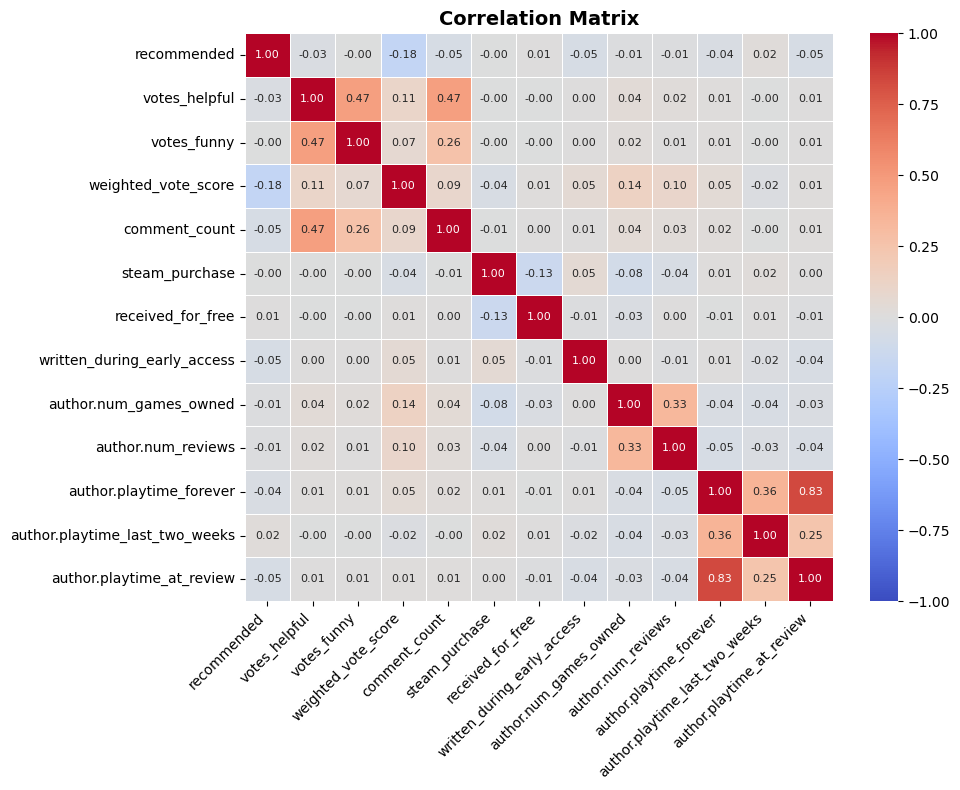

In [18]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    df_filtered.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",      
    vmin=-1, vmax=1,      
    linewidths=0.5,       
    annot_kws={"size": 8})

plt.xticks(rotation=45, ha="right")            
plt.title("Correlation Matrix", fontsize=14,weight="bold")  
plt.tight_layout()                   
plt.show()

## Correlation Matrix Analysis

This correlation matrix displays the relationships between the different variables in the dataset, with values ranging from -1 to 1 indicating whether or not there is a negative correlation (less than 0) or a positive correlation (greater than 0), or neither. 
Here is an analysis of some correlations between the different variables:

- **Positive Correlations**:

    - `author.playtime_forever` and `author.playtime_at_review` show a strong positive correlation (**0.83**), indicating that the total playtime correlates well with the playtime at review, as expected.
    - `author.num_games_owned` and `author.num_reviews` have a moderate positive correlation (**0.33**), suggesting that users who own more games tend to leave more reviews.
    - `votes_funny` and `votes_helpful`: There is a moderate positive correlation (0.47), suggesting that reviews marked as funny are also likely to be found helpful. This could imply that humorous reviews tend to engage users more,        leading them to vote both "funny" and "helpful."
    - `votes_funny` and `comment_count`: There is a small positive correlation (0.26) indicates that funny reviews tend to attract more comments. This may suggest that humorous content sparks discussion or interaction among users.
    - `votes_helpful` and `comment_count`: There is a moderate positive correlation (0.47), suggesting that if a review had receive a high number of helpful votes, it may indicate that users find it informative or insightful. This can lead to more players commenting on the review to discuss their own experiences, ask questions, or provide additional insights about the game.

- **Negative Correlations**:

    - `written_during_early_access` and `author.num_games_owned` show a moderate negative correlation (**-0.26**), implying that users who participate in early access reviews may own fewer games on average.
    - `written_during_early_access` and `author.playtime_forever` also have a moderate negative correlation (**-0.26**), which could indicate that early access reviewers might have lower total playtime as expected.

- **Weak or Near-Zero Correlations**:

    - Binary variables like `steam_purchase` and `received_for_free` show very weak correlations with other features, which may indicate that whether a game was purchased or received for free has little impact on other user.


## App names based on last played time 

In [19]:
df["author.last_played"].value_counts()

author.last_played
1970-01-02 00:00:00    2228
2013-03-30 07:00:00      96
2013-04-02 07:00:00      96
2013-04-01 07:00:00      94
2013-03-31 07:00:00      94
                       ... 
2020-12-07 08:13:10       1
2020-12-14 17:16:39       1
2020-12-11 23:43:28       1
2020-12-09 19:38:41       1
2020-10-16 14:12:23       1
Name: count, Length: 15973404, dtype: int64

In [20]:
df[["app_name","author.last_played"]].loc[df["author.last_played"]==df["author.last_played"].max()] 

,app_name,author.last_played
21746605,Half-Life: Alyx,2021-01-23 20:35:42


<img src="https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/546560/capsule_616x353.jpg" width="400"/>

**Half-Life: Alyx**: Released on March 23, 2020, is a virtual reality (VR) first-person shooter. 

In [21]:
df[["app_name", "author.last_played"]].loc[df['author.last_played'] == df['author.last_played'].min()]

,app_name,author.last_played
3226433,Takedown: Red Sabre,1970-01-01
9668507,Undertale,1970-01-01
10358093,Dead Cells,1970-01-01
10358094,Dead Cells,1970-01-01
10358138,Dead Cells,1970-01-01
10359026,Dead Cells,1970-01-01
10359199,Dead Cells,1970-01-01
10362104,Dead Cells,1970-01-01
10363027,Dead Cells,1970-01-01
10364433,Dead Cells,1970-01-01


<img src="https://imgcdn.agendadigitale.eu/wp-content/uploads/2020/07/14155539/undertale.jpg" alt="Undertale" width="400"/> <img src="https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/588650/capsule_616x353.jpg" width="400"/><img src="https://shared.cloudflare.steamstatic.com/store_item_assets/steam/apps/236510/capsule_616x353.jpg" width="400"/>

- **Undertale** : Released on Sep 15, 2015, is an RPG (role-playing game);
- **Dead Cells** : Released on Aug 7, 2018, is an Action-Adventure Roguelike;
- **Takedown: Red Sabre** : Released on Dec 12, 2013, is a Tactical Shooter. 

**The previous three videogames were released after 1970. There was probably a problem in the conversion with `dateparse function` and they were assigned that date because their value before was 0. In fact, January 1, 1970 represents the starting point of the system of measuring time in numbers of seconds.** 

In [22]:
#To resolve this problem we can filter the 'author.last_played' column with the dates after than January 1, 2000 :

valid_entries_time = df.loc[(df['author.last_played'] > pd.Timestamp('2000-01-01'))]
df[["app_name", "author.last_played"]].loc[df['author.last_played'] == valid_entries_time['author.last_played'].min()]

,app_name,author.last_played
588847,Counter-Strike: Source,2007-02-04 08:00:00


<img src="https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/240/header.jpg" width="400"/> 

**Counter-Strike: Source** : Released on Nov 1, 2004, is a Tactical shooter game
 


## Language and Review Analysis 

### View all languages of user-written reviews on the Steam gaming platform :

In [23]:
pd.unique(df.language)

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

In [24]:
print(f"The number of different languages used in reviews on the Steam platform is: {len(pd.unique(df.language))}")

The number of different languages used in reviews on the Steam platform is: 28


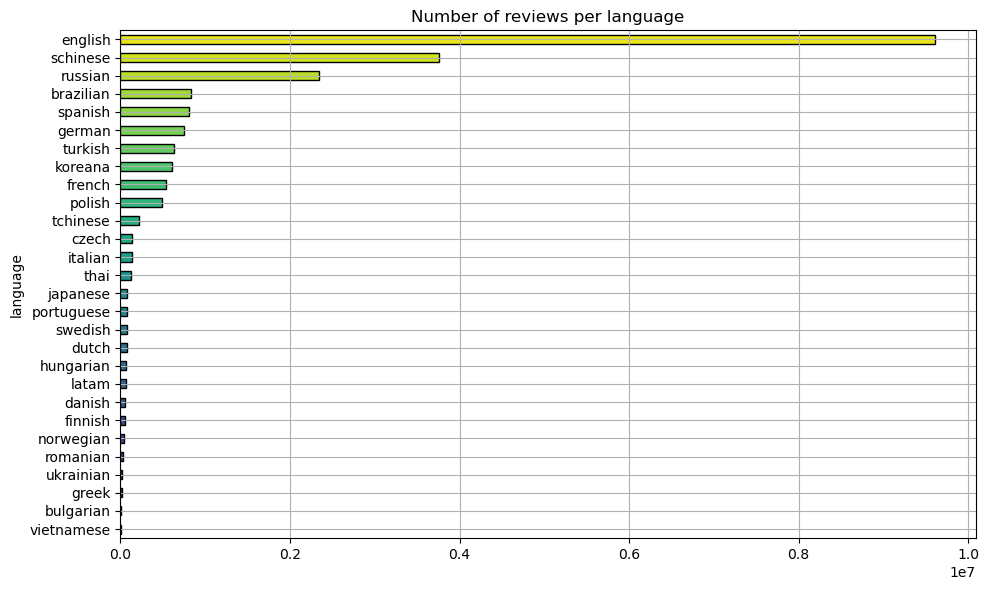

In [25]:
viridis = sns.color_palette("viridis",len(df.language.value_counts()))
plt.figure(figsize=(10,6))
df.language.value_counts().sort_values(ascending=True).plot.barh(
    width=0.5, 
    title="Number of reviews per language", 
    color=viridis,
    edgecolor="black"
)
plt.tight_layout()
plt.grid()
plt.show()

From the barplot in the figure, it can be seen that the largest number of reviews written by users in 2021 are in English followed by Chinese and Russian.A possible reason for the largest number of reviews in English, followed by Chinese and Russian, could be the global prevalence of these languages among internet users. English remains the most widely used language online, enabling a larger base of users to engage with content and share reviews. Similarly, Chinese and Russian have large native-speaking populations, many of whom increasingly participate in global and local online platforms, contributing significantly to review counts. Additionally, these languages are commonly used on major review platforms, which may encourage users to write reviews in their native or most commonly used language.

In [26]:
top3_languages=df.language.value_counts().index[:3]
top3_languages # save the top three index in one variable called top3_languages

Index(['english', 'schinese', 'russian'], dtype='object', name='language')

In [27]:
language= df["language"].copy() # define a copy of language column
# Replaces values in 'language' that are NOT in 'top3_languages' with "other languages"
language.loc[~language.isin(top3_languages)] = "other languages"
language.value_counts()

language
english            9606838
other languages    5980058
schinese           3758221
russian            2342828
Name: count, dtype: int64

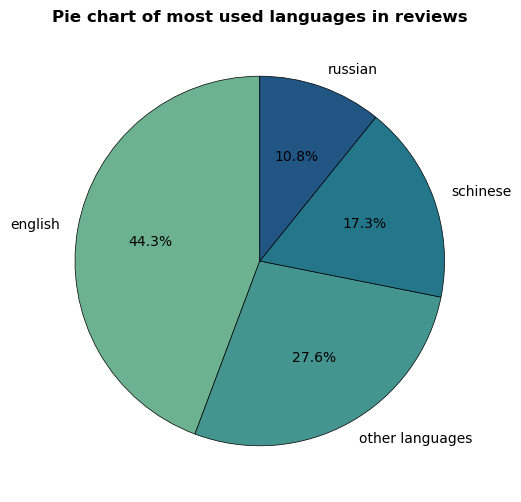

In [91]:
# Create a pie chart to visualize the percentage distribution of languages in the dataset
plt.figure(figsize=(6, 6))
plt.pie(language.value_counts(), labels=language.value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(language.value_counts())),
         wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title('Pie chart of most used languages in reviews',fontsize=12, fontweight='bold')
plt.show()

This pie chart shows the distribution of languages used in reviews. English dominates with 44.3% of all reviews, making it the most used language in reviews as highlighted in the previous chat bar, followed by Chinese and Russian with significantly lower percentages. Other languages occupy a good percentage of the distribution at 27.6%. **Given the large influx of English into the dataset, we can continue the analysis only on that language to reduce the memory space in future data manipulation**.

## Playtime distribution of Steam users

In [29]:
hour=3600  # in terms of second one hour is composed 3600 seconds
playtime_intervals = [0,hour*3,hour*6,hour*12, hour*24, float('inf')]  # let's define some intervals
playtime_names = ['Less than 3 hours','3-6 hours','6-12 hours', '12-24 hours', '1+ days']  # define the names of intervals based by hours that player played 
playtime_df = pd.cut(df['author.playtime_forever'], bins=playtime_intervals, labels=playtime_names, right=True)

In [30]:
playtime_counts=playtime_df.value_counts()
playtime_counts

author.playtime_forever
Less than 3 hours    14976088
3-6 hours             2612766
6-12 hours            2015197
12-24 hours           1307504
1+ days                776378
Name: count, dtype: int64

In [31]:
# Show the percentages
for value,index in zip(playtime_counts,playtime_counts.index):
    print(f"{index}: {value/sum(playtime_counts) * 100:.2f}%")
    

Less than 3 hours: 69.05%
3-6 hours: 12.05%
6-12 hours: 9.29%
12-24 hours: 6.03%
1+ days: 3.58%


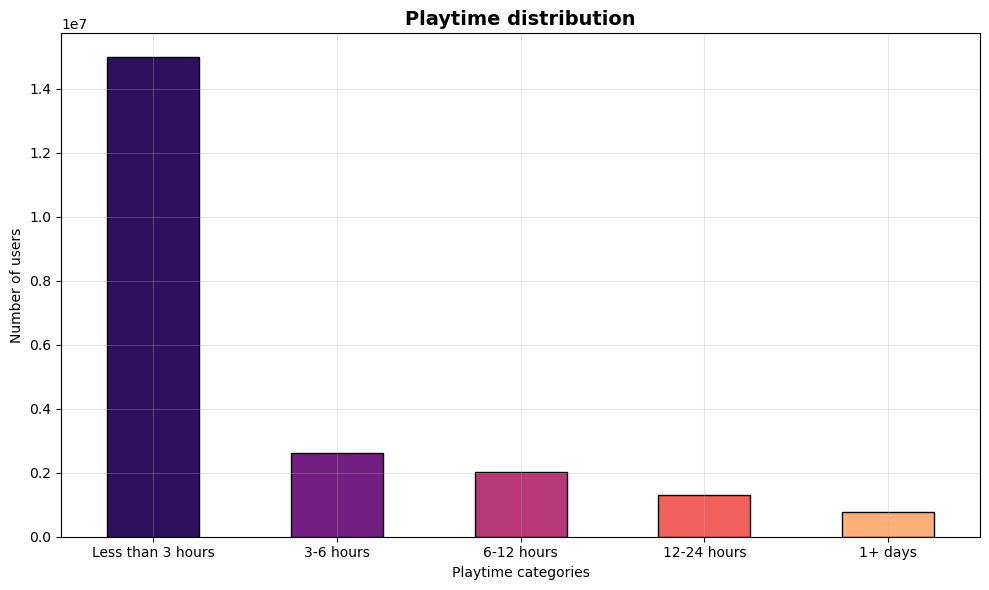

In [32]:
magma=sns.color_palette("magma", 5)
plt.figure(figsize=(10, 6))

playtime_df.value_counts().plot.bar(color=magma, edgecolor='black')

plt.xlabel('Playtime categories')
plt.ylabel('Number of users')
plt.title('Playtime distribution',fontsize=14,weight="bold")
plt.xticks(rotation=360)  
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Playtime distribution analysis: 
The distribution bar chart shows a large predominance in the number of users who play for short sessions: 
- Approximately 15 million people dedicate less than 3 hours to the game, representing the highest segment. 
- A drastic drop is then noted in the subsequent bands, with approximately 2.6 million users who play between 3-6 hours, followed by a gradual decline through the 6-12 hour categories (2 million), 12-24 hour categories (1.3 million), until reaching approximately 800,000 users who play for more than a day. 
## Considerations:
- This distribution suggests that the Steam platform is mainly dominated by a casual audience, with a modest player base investing longer periods in their gaming sessions.
- The high number of gamers who play for short sessions could represent the segment of people with limited gaming time, such as students or workers who seek short but frequent moments of leisure.
- Analysis of play time can be influenced by seasonal trends, with peaks during holidays, weekends, or when new games or a new updates are launched.

## Analysis of Playtime and Game Recommendations

In [33]:
# Let's see if there is a connection between the hours played and whether the game is recommended or not
recommendations_playtime=pd.concat([playtime_df,df["recommended"]],axis=1)  # union two column of different data

# show the table
recommendations_playtime

,author.playtime_forever,recommended
0,Less than 3 hours,True
1,Less than 3 hours,True
2,Less than 3 hours,True
3,Less than 3 hours,True
4,Less than 3 hours,True
...,...,...
21747371,Less than 3 hours,True
21747372,Less than 3 hours,True
21747373,Less than 3 hours,True
21747374,Less than 3 hours,True


In [82]:
# Grouping the DataFrame 'recommendations_playtime' by the 'recommended' column
# This separates the data into two groups: those who recommended (True) and those who did not (False)

groupby_recommendations = recommendations_playtime.groupby(['recommended','author.playtime_forever']).value_counts().unstack()
groupby_recommendations.sort_index(ascending=False)

author.playtime_forever,Less than 3 hours,3-6 hours,6-12 hours,12-24 hours,1+ days
recommended,,,,,
True,13272291,2296279,1695215,1065347,639507
False,1703797,316487,319982,242157,136871


## Considerations
- As highlighted in the correlation matrix, there is no significant correlation between the hours played and whether the game is recommended or not. This information suggests that the amount of time a player spends in the game does not necessarily influence their likelihood of recommending it to others.

- It is important to note that while players may invest many hours into a game, this does not automatically translate into a positive recommendation. Factors such as individual preferences, expectations, and experiences with the game's mechanics, narrative, or other factos can all play a crucial role in shaping a player's overall perception.

## Number of videogames owned per Steam utent 

In [35]:
number_videogames_owned=df["author.num_games_owned"].value_counts().sort_values(ascending=False)

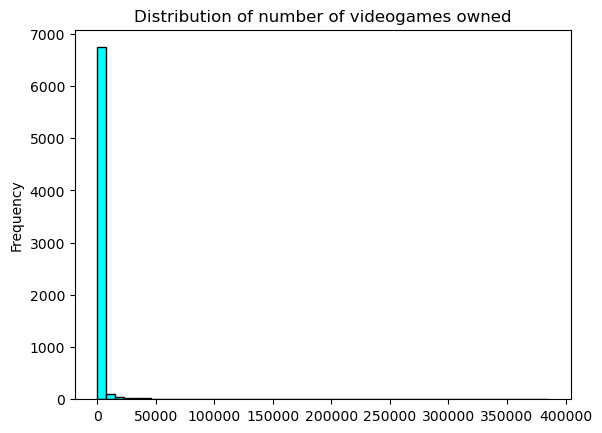

In [36]:
number_videogames_owned.plot.hist(color="aqua",edgecolor="black",bins=50,title="Distribution of number of videogames owned")
plt.show()

#### The first histogram with all the data relating to the number of games owned by Steam users shows that most of them own very few games, with some outliers owning a very high number.

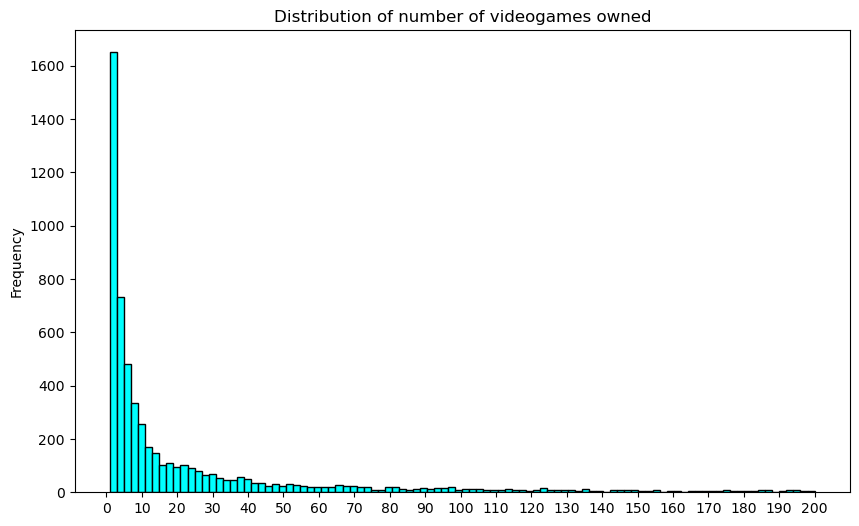

In [37]:
# Focus on users with 200 or fewer games owned to improve visualization and remove possible outliers

fig= number_videogames_owned.loc[number_videogames_owned<=200].plot.hist(color="aqua",edgecolor="black",bins=100,title="Distribution of number of videogames owned",figsize=(10,6))
fig.set_xticks(range(0, 201, 10)) # Divide into intervals of 10, making it easier to interpret the frequency 
plt.show()

The histogram illustrates the distribution of the number of videogames owned by users, focusing on those with 200 or fewer games.

- The distribution is highly skewed to the left, with the majority of users owning a small number of games. Especially a significant number of users own fewer than 10 games.
- As the number of games owned increases, the frequency **decreases rapidly**, showing that only a small proportion of users own a larger collection of these.

### **We create different categories of users based on the games they own in their Steam library**

In [38]:
bins = [1, 10, 20, 51, 201, float('inf')]  
Gamer_categories = ['Occasional', 'Casual Gamer', 'Moderate Gamer', 'Passionate Gamer', 'Collector']  

In [39]:
df['game_category'] = pd.cut(df['author.num_games_owned'], bins=bins, labels=Gamer_categories, right=True)
category_counts = df['game_category'].value_counts()

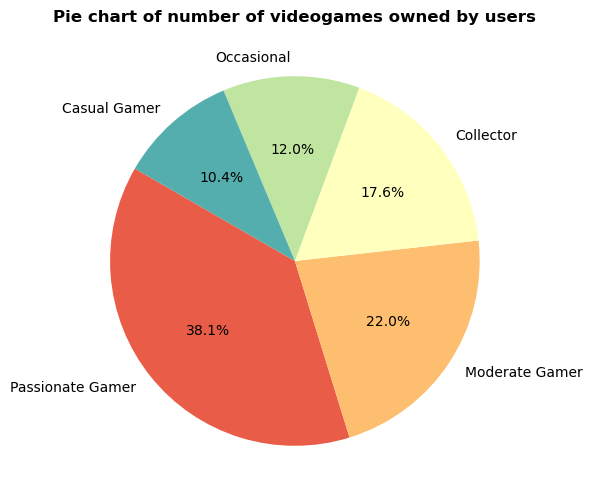

In [40]:
Spectral=sns.color_palette("Spectral",5)
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=150, colors=Spectral)
plt.title('Pie chart of number of videogames owned by users',fontsize=12, fontweight='bold')
plt.show()

## User Distribution Analysis by Game Ownership

The pie chart illustrates the distribution of Steam users by the number of games they own. **Users are divided into five distinct groups:**

- **Passionate Gamer (201+ games):** This is the largest category, comprising 38.1% of users. Avid gamers are likely to have a strong dedication to gaming, amassing a sizeable collection of games. This group may consist of users who are frequently active on the platform, who purchase and play a wide variety of games, such as streamers, YouTubers, and content creators from other platforms.

- **Moderate Gamer (51-200 games):** The second largest group, comprising 22% of the user base, is likely to consist of gamers who enjoy gaming but have a small library. They may be selective in their purchases, purchasing only games they are particularly interested in.

- **Collector (21-50 games):** The third group includes 17.6% of users who focus on building as large a game library as possible. They may not necessarily play all games extensively, but they enjoy accumulating games, perhaps out of interest in building a collection or taking advantage of discounts on the platform.

- **Occasional Gamer (11-20 games):** This group, representing 12.4% of users, likely represents individuals who play games sporadically. Occasional gamers may purchase games infrequently and play only occasionally, perhaps reflecting a more casual interest or limited play time.

- **Casual Gamer (1-10 games):** The smallest group, representing 10.4% of users, are casual gamers. These users likely have a minimal collection of games and interact with the platform infrequently, using it primarily for occasional entertainment.

### Considerations

The chart shows a broad level of user activity on Steam, with nearly 60% of users classified as either passionate or moderate gamers. This suggests that a significant portion of the user base is heavily engaged in gaming, while smaller segments use the platform more casually.


## The bests and worsts selling games on Steam 

In [41]:
best_selling_games=df["app_name"].value_counts().sort_values(ascending=False)/1000
worst_selling_games=df["app_name"].value_counts().sort_values(ascending=False)[-10:-1]

In [42]:
best_selling_games[:10]

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     1642.631
Grand Theft Auto V                1016.370
Tom Clancy's Rainbow Six Siege     839.838
Terraria                           671.425
Garry's Mod                        653.815
Rust                               548.020
Rocket League                      497.249
PAYDAY 2                           486.110
Among Us                           483.393
The Witcher 3: Wild Hunt           468.330
Name: count, dtype: float64

In [43]:
worst_selling_games[-10:-1]

app_name
Rapture Rejects                    1598
WWE 2K17                           1496
Budget Cuts                        1295
Toukiden 2                         1199
Slipstream                         1101
Don't Escape: 4 Days to Survive    1011
Out of the Park Baseball 19         699
Shadow Complex Remastered           699
Name: count, dtype: int64

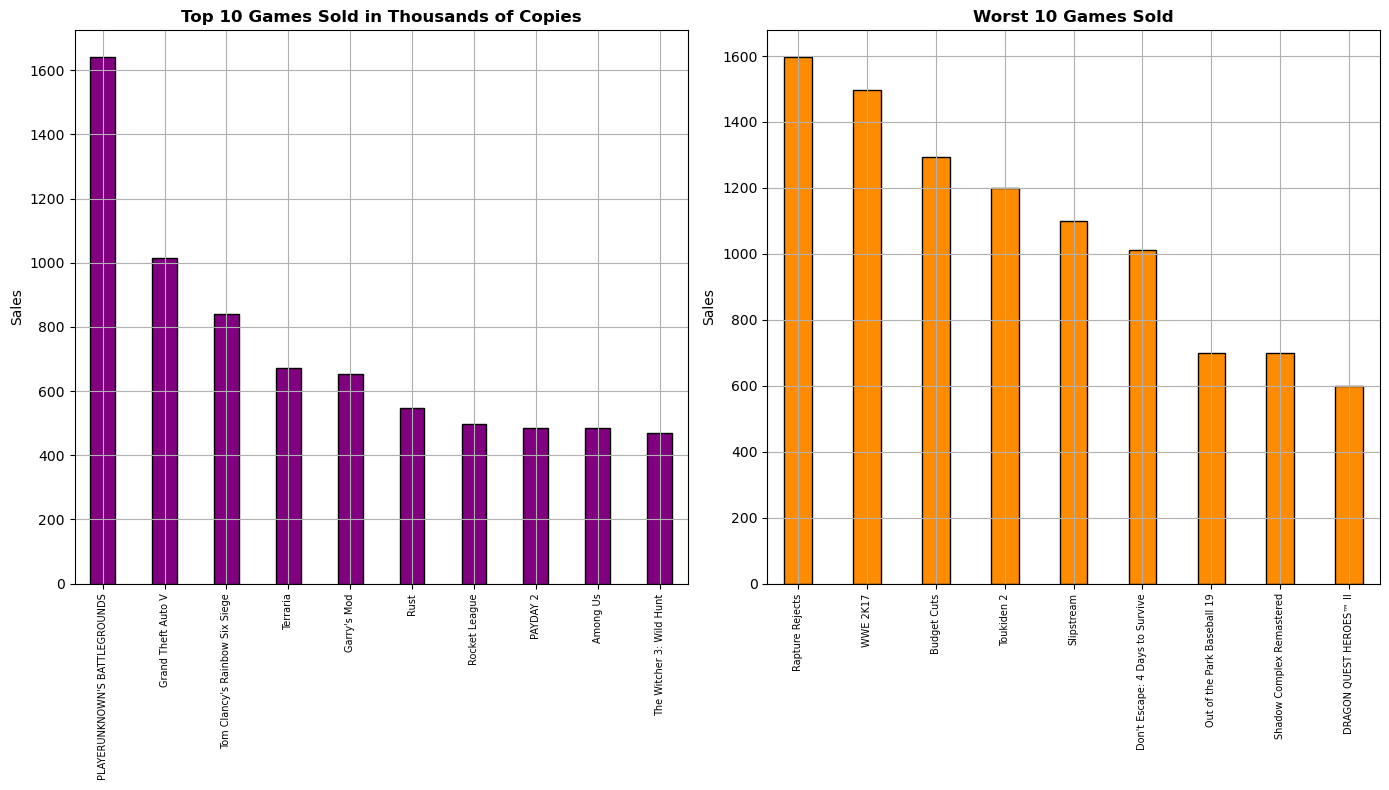

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
best_selling_games[:10].plot.bar(y='Sales', ax=axs[0], color='purple',edgecolor="black",width=0.4)
axs[0].set_title("Top 10 Games Sold in Thousands of Copies",weight="bold")
axs[0].tick_params(axis='x', labelsize=7)
axs[0].set_ylabel("Sales")
axs[0].set_xlabel("")
axs[0].grid()

worst_selling_games.plot.bar(y='Sales', ax=axs[1], color='darkorange',edgecolor="black",width=0.4)
axs[1].set_title("Worst 10 Games Sold",weight="bold")
axs[1].tick_params(axis='x', labelsize=7)
axs[1].set_ylabel("Sales")
axs[1].set_xlabel("")
axs[1].grid()  

plt.tight_layout()
plt.show()

From the graphs shown, it can be highlighted that the game "Playerunknown's Battlegrounds" (PUBG) in 2021 is the best-selling with over 160,000 copies. On the other hand, the game "Dragon Quest Heroes 2" is the least sold with only 600 copies. The success of online multiplayer games like PUBG  likely stems from both their competitive nature and the gaming industry's growth during the COVID-19 pandemic, when people sought virtual social interactions and entertainment while staying at home. Additionally, the gap between top and lower sellers suggests that factors like online component, cross-platform availability and continuous game updates play crucial roles in commercial success.

# BONUS. Sentiment analysis of english reviews by users in Steam platform

## Why only english reviews were considered

The decision to focus exclusively on english reviews was made for both convenience and accuracy. Translating millions of reviews written in a multitude of languages into english presents significant challenges that would impact the quality and consistency of the analysis. Here is a breakdown of the main issues involved:

1. Machine translation tools, while powerful, often struggle with nuances, colloquialisms, and slang unique to each language. This can lead to mistranslations or loss of context, especially with game-specific terminology or culturally specific references;

2. Processing and translating millions of reviews from multiple languages is a resource-intensive task. It would not only require significant computational power, but also additional layers of advanced error checking to ensure accuracy;

3. Sentiment analysis algorithms often perform best when trained in a specific language due to linguistic and cultural nuances. By focusing only on English reviews, the analysis will be more reliable and accurate, as it avoids the complexities and potential inaccuracies of machine translation;

4. The English review dataset comprises nearly 50% of all entries in the `language` column, providing a substantial and representative sample size. This large portion of data helps ensure that the analysis results offer a reliable reflection of overall user sentiments.

In [45]:
# Only consider specific column for this analysis
english_reviews = df[["review", "recommended", "votes_helpful"]].loc[df["language"] == "english"]
english_reviews

,review,recommended,votes_helpful
3,"One of the best RPG's of all time, worthy of a...",True,0
5,"good story, good graphics. lots to do.",True,0
6,"dis gud,",True,0
18,favorite game of all time cant wait for the Ne...,True,0
20,Why wouldn't you get this,True,0
...,...,...,...
21747369,best game ever\n,True,0
21747371,Holy balls,True,0
21747372,"A tripod thing bears down on you, it looks imm...",True,0
21747373,Honestly this is the best vr game ever,True,0


## VADER Lexicon for Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool designed for analyzing social media text and short user-generated content. By downloading the VADER lexicon using `nltk.download('vader_lexicon')`, users can access a pre-built dictionary that provides sentiment scores for words, allowing for efficient sentiment analysis of text data through the Natural Language Toolkit (NLTK) library.

In [46]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\flavi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
text_analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze the sentiment of a given text
def get_sentiment(text):
    # Use the analyzer to get the polarity scores of the input text
    # The 'compound' score represents the overall sentiment, ranging from -1 (negative) to 1 (positive)
    score = text_analyzer.polarity_scores(text)['compound']
    
    # Return the compound sentiment score
    return score

# Swifter Library Overview

The **Swifter** library in Python is used to optimize to makes data processing in pandas DataFrames faster and more efficient, especially for functions that require complex processing on large datasets.

## Main function:

- **Parallelization:** The library allows you to apply the get_sentiment function to each element of the review column in parallel, using multiple CPU cores. This results in a significant reduction in execution time compared to using the pandas apply() function alone.



In [48]:
english_reviews['sentiment'] = english_reviews['review'].swifter.apply(get_sentiment)
english_reviews['sentiment'].head()

Pandas Apply:   0%|          | 0/9606838 [00:00<?, ?it/s]

3     0.7964
5     0.7003
6     0.0000
18    0.4588
20    0.0000
Name: sentiment, dtype: float64

In [49]:
english_reviews['sentiment'].describe()

count    9.606838e+06
mean     3.850793e-01
std      5.012389e-01
min     -1.000000e+00
25%      0.000000e+00
50%      5.095000e-01
75%      8.020000e-01
max      1.000000e+00
Name: sentiment, dtype: float64

## Classify the scores as positive, negative, or neutral

In [50]:
english_reviews['sentiment_names'] = np.where(english_reviews['sentiment'] < 0, 'negative', np.where(english_reviews['sentiment'] == 0, 'neutral', 'positive'))

# count the values for eache sentiment group
english_reviews['sentiment_names'].value_counts()

sentiment_names
positive    6700339
neutral     1478270
negative    1428229
Name: count, dtype: int64

## Example of reviews with **positive** sentiment

In [51]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "positive"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: One of the best RPG's of all time, worthy of any collection
2. Review: good story, good graphics. lots to do.
3. Review: favorite game of all time cant wait for the NexGen Versiion
4. Review: it is ok

5. Review: worth



## Example of reviews with **neutral** sentiment

In [52]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "neutral"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: dis gud,
2. Review: Why wouldn't you get this
3. Review: Isn't Geralt hot enough to get both Yennefer and Triss ? I guess I watched too much harem anime...
4. Review: The only thing bigger than the world map is ur mom
5. Review: .


## Example of reviews with **negative** sentiment

In [53]:
for i, review in enumerate(english_reviews["review"][english_reviews['sentiment_names'] == "negative"][:5], start=1):
    print(f"{i}. Review: {review}")

1. Review: The game is enjoyable enough but...
-Combat has plenty of options but the game will play for you at times, takes away from player achievements.
-The Story is good so far but so much of it, listening to every nagging thought is getting old fast.
-The swords and armor having a level is retarded, how is it that this legendary warrior cannot use the same sword of the 8 guys he just killed. This feature is killing the game for me.
-The repairs and crafting I hate, its not my thing. never is.
2. Review: They certainly dumbed down the series since the last release. Sure it raked in a larger audience but it sacrificed what is was previously in the process, which was once well written and unique instead became copy-paste and bland. The game completely omits that Triss did nothing but screw Geralt over with everything she's done involving for the Sorceresses Lodge, most likely just to have her as a romance option. This isn't the only thing it omits either.

Nothing says player hand ho

In [54]:
total= sum(english_reviews['sentiment'].value_counts())

In [55]:
# Calculate the percentage of each group
Positive_percent=english_reviews['sentiment_names'].value_counts()[0]/total * 100
Neutral_percent= english_reviews['sentiment_names'].value_counts()[1]/total * 100
Negative_percent= english_reviews['sentiment_names'].value_counts()[2]/total * 100

print(f"The Positive percent is {str(round(Positive_percent,2))}% "
     f"Neutral percent is {str(round(Neutral_percent,2))}% "
     f"Negative percent is {str(round(Negative_percent,2))}%")

The Positive percent is 69.75% Neutral percent is 15.39% Negative percent is 14.87%


## Plot a histogram of **Sentiment** distribution

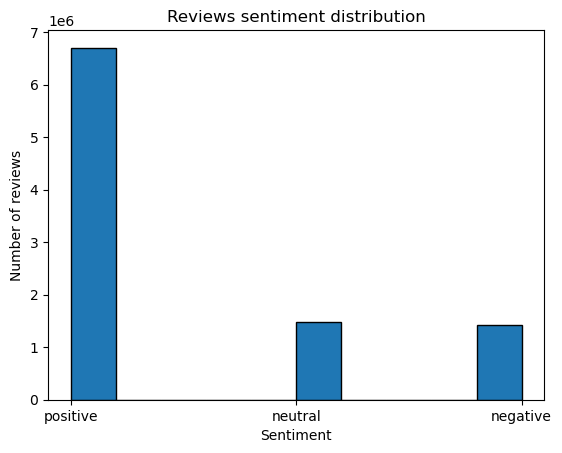

In [56]:
plt.hist(english_reviews['sentiment_names'], edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.title('Reviews sentiment distribution')
plt.show()

## Steam game reviews sentiment Analysis

The following analysis explores the sentiment distribution of Steam game reviews in **English**, which range from -1.0 (negative) to 1.0 (positive).

### Dataset size information and implications

- For this analysis we considered almost 10 milion text ☠

### Comments of the results

- Steam community shows a **strong tendency** toward positive feedback
- Only about 14.87% of reviews are negative
- The number of neutral reviews is similar to the number of negative reviews

### Considerations

- Steam users generally provide **positive feedback**, indicating satisfaction with the games reviewed.
- Extremely negative reviews are **uncommon**, suggesting that users are either content with their experiences or selective in their critiques.
- **Moderate positivity** seems to be the norm rather than extreme opinions, reflecting a balanced perspective among reviewers.
- The review system illustrates a **healthy and engaged community**, contributing to the overall success of games on the platform.

## Does the sentiment analysis align with whether the application is recommended or not ?

In [57]:
# Group by 'sentiment' and count occurrences of 'recommended' values
groupby_sentiment = english_reviews.groupby('sentiment_names')['recommended']
groupby_sentiment.value_counts()

sentiment_names  recommended
negative         True            896358
                 False           531871
neutral          True           1340362
                 False           137908
positive         True           6321899
                 False           378440
Name: count, dtype: int64

In [58]:
# Calculate the percentages
groupby_sentiment_percent=groupby_sentiment.value_counts(normalize=True).unstack() * 100
# Rename columns for clarity
groupby_sentiment_percent.columns = ['Not Recommended (%)', 'Recommended (%)']
groupby_sentiment_percent = groupby_sentiment_percent.round(1)

groupby_sentiment_percent

,Not Recommended (%),Recommended (%)
sentiment_names,,
negative,37.2,62.8
neutral,9.3,90.7
positive,5.6,94.4


In [59]:
groupby_sentiment = groupby_sentiment.value_counts().unstack()
# Rename columns for clarity
groupby_sentiment.columns = ['Not Recommended', 'Recommended']

# Show new table:
groupby_sentiment

,Not Recommended,Recommended
sentiment_names,,
negative,531871,896358
neutral,137908,1340362
positive,378440,6321899


In [60]:
# Melting the groupby_sentiment dataFrame to transform it from wide format to long format.
# This is useful for visualizing data with libraries like Seaborn or Matplotlib.
groupby_sentiment_melted = pd.melt(groupby_sentiment.reset_index(), id_vars='sentiment_names', value_vars=['Not Recommended', 'Recommended'],var_name='Recommendation status',  value_name='Value_counts')
#show the data in long format:
groupby_sentiment_melted

,sentiment_names,Recommendation status,Value_counts
0,negative,Not Recommended,531871
1,neutral,Not Recommended,137908
2,positive,Not Recommended,378440
3,negative,Recommended,896358
4,neutral,Recommended,1340362
5,positive,Recommended,6321899


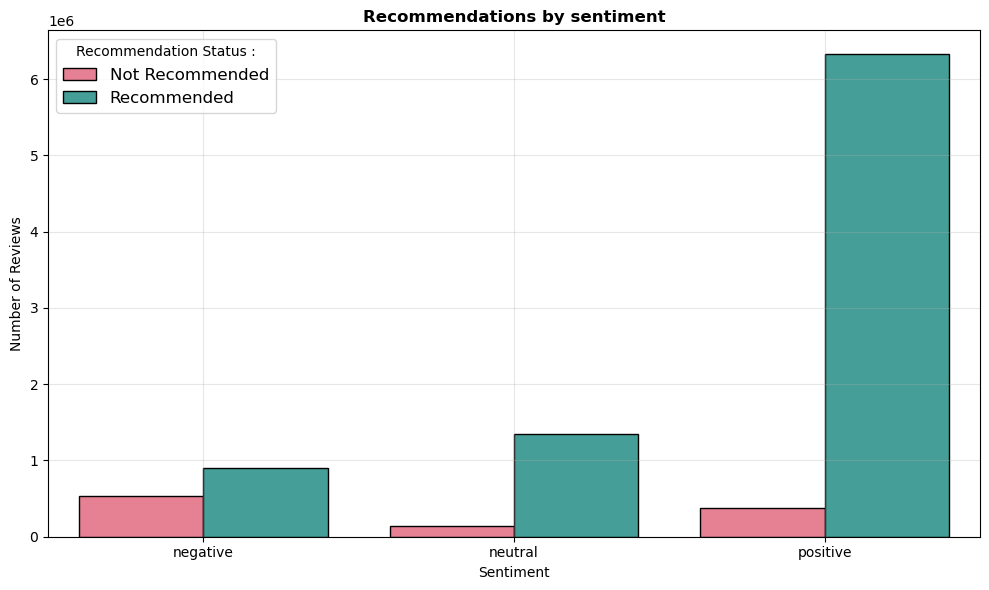

In [61]:
# Plot the graph 
plt.figure(figsize=(10,6))
sns.barplot(data=groupby_sentiment_melted, x='sentiment_names', y='Value_counts', hue='Recommendation status', palette="husl",edgecolor="black")
plt.title('Recommendations by sentiment',fontsize=12,weight="bold")
plt.xlabel('Sentiment',fontsize=10)
plt.ylabel('Number of Reviews',fontsize=10)
plt.legend(title='Recommendation Status :',fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()  
plt.show()

## Observations from the grouped bar chart

Looking at the clustered bar chart showing "Recommendations by Sentiment", we can make several observations:

### 1. Strong Positive Alignment
- There is a very strong correlation between positive sentiment and recommendations.
- The number of recommended reviews with positive sentiment (teal bar) is significantly higher (~6 million) than non-recommended reviews (pink bar).
- This suggests that users who recommend the app generally express positive sentiment in their reviews.

### 2. Neutral Reviews
- For neutral sentiment, there is still a preference for recommending the app.
- The ratio shows more recommendations than non-recommendations, although the overall numbers are lower than positive reviews.
- This suggests that neutral reviewers also tend to take other factors into account beyond this.

### 3. Negative Reviews
- For negative sentiment, the gap between recommended and non-recommended is smaller. -
- There is still a slight bias towards recommendations even in negative reviews.
- This is interesting because it highlights that some users may criticize aspects of the game but still recommend it. This duality suggests that users are able to distinguish between specific features or experiences that they feel are lacking and the overall value of the game. It implies that despite some criticism, they recognize the game's strengths, such as enjoyable gameplay mechanics, engaging storylines, or other aspects that enhance their experience. This phenomenon indicates a deeper level of engagement, where users are not simply looking for perfection, but are willing to recommend the game based on its overall contribution to their enjoyment or satisfaction.

## Insights

Based on these observations, we can conclude that:

1. There is a clear correlation between positive sentiment and likelihood to recommend.
2. Even neutral and negative reviews tend to lean towards recommendations, suggesting that the app has fundamental value despite criticism.
3. The vast majority of reviews are positive and recommended, which indicates overall user satisfaction.
4. The relatively small number of non-recommended reviews across the board suggests that the app generally meets user expectations.



## Correlation between the sentiment of a review and the number of helpfulness votes it receives

In [62]:
vote_sentiment=english_reviews[['sentiment', 'votes_helpful','sentiment_names']]
vote_sentiment

,sentiment,votes_helpful,sentiment_names
3,0.7964,0,positive
5,0.7003,0,positive
6,0.0000,0,neutral
18,0.4588,0,positive
20,0.0000,0,neutral
...,...,...,...
21747369,0.6369,0,positive
21747371,0.0000,0,neutral
21747372,0.8074,0,positive
21747373,0.8020,0,positive


In [63]:
# Count the number of votes based on the sentiment of the review (Positive, Negative,Neutral)

vote_sentiment.groupby('sentiment_names')['votes_helpful'].sum().sort_values(ascending=False)

sentiment_names
positive    11222225
negative     5573497
neutral      1854903
Name: votes_helpful, dtype: int32

In [64]:
# show the correlation between sentiment and votes_helpful column

vote_sentiment[['sentiment', 'votes_helpful']].corr()

,sentiment,votes_helpful
sentiment,1.000000,-0.011093
votes_helpful,-0.011093,1.000000


## Review sentiment and analysis of the results and discuss potential trends

According to the results, there is no significant correlation between the sentiment of a review and the number of helpfulness votes it receives. However, it is noteworthy that reviews with positive sentiment receive significantly more votes overall than negative and neutral reviews. This suggests that:

- Users rate the helpfulness of a review independently of its sentiment.
- Positive reviews receive **11,222,225 votes**, indicating high engagement and support among users for that type of review.
- Negative reviews receive **5,573,497 votes**, while neutral reviews receive **1,854,903 votes**, confirming that neutral reviews are not voted because they fail to provide enough information about the player's gaming experience as negative and positive reviews do.

### Implications
- Although there is a high volume of helpfulness votes for positive reviews, the lack of significant correlation indicates that users may still evaluate reviews based on criteria beyond sentiment, such as:
- Quality of writing ;
- Detail of analysis ;
- Clarity and structure of the review.

Users appear to evaluate the helpfulness of a review more objectively, as the positive or negative tone does not significantly influence its perceived helpfulness beyond the number of votes it receives.




# **Algorithm question**

## Informat about the Algorithm

You are given two positive integers, ( n ) (where 1 ≤ n ≤ 10^9) and  k (where q ≤ k ≤ 100).Your task is to express n as the sum of k positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find a₁, a₂, ..., aₖ , each aᵢ > 0, such that n = a₁ + a₂ + ... + aₖ, and all aᵢ simultaneously are either even or odd. If it's impossible to represent n in this way, report that no such representation exists.

- ## Input
In the first input line, you will receive a number t (where 1 ≤ t ≤ 100), representing the number of test cases. The following t lines will contain two values, n and k, corresponding to each test case.

- ## Output
For each test case, if it is possible to represent n as the sum of k positive integers, all of the same parity (either all even or all odd), print YES and provide the corresponding values of aᵢ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print NO.

# Possible solution: 

In [65]:
def find_sum_combinations(n, k):
    # Initialize arrays for both possibilities: odd and even numbers
    odd_sums = [1] * k   # Array of k ones (odd numbers)
    even_sums = [2] * k  # Array of k twos (even numbers)
    
    # Try to find a solution with odd numbers
    # Check if it's possible to sum up to n with k odd numbers
    if sum(odd_sums) <= n and (n % 2 == k % 2):
        odd_sums[-1] = n - sum(odd_sums[:-1])  # Calculate the last element needed
        if odd_sums[-1] > 0:  # Verify if the solution is valid (last number is positive)
            print("YES")
            print(*odd_sums)
            return ""  #In this case we use return like this to not get more prints and "None" after the results are displayed
    
    # Try to find a solution with even numbers
    # Check if it's possible to sum up to n with k even numbers
    if sum(even_sums) <= n and (n % 2 == 0):
        even_sums[-1] = n - sum(even_sums[:-1])  
        if even_sums[-1] > 0:  
            print("YES")
            print(*even_sums)
            return ""
    
    # No valid solution found with either odd or even numbers
    print("NO")
    return ""  

# Computational complexity of the algorithm

The function `find_sum_combinations(n, k)` is designed to determine whether a positive integer **n** can be expressed as the sum of **k** positive integers, all with the same parity (all odd or all even). 

Here is an analysis of its computational complexity:

- Odd number check: Creates an initial array of k ones (all odd numbers). Check if sum can be equal to n while maintaining odd parity

**Time:** O(k) for array creation and sum calculation

- Check for even numbers: Create an initial array of k twos (all even numbers) Check if sum can be equal to n while maintaining even parity

**Time:** O(k) for array creation and sum calculation

## Condtions: 

For odd numbers: sum(odd_sums) ≤ n and (n % 2 == k % 2)  
- The process involves iterating through all  k  elements to compute the total sum, which again takes O(k) time due to the need to perform k additions.

**This operation and check is O(k)**

For even numbers: sum(even_sums) ≤ n and (n % 2 == 0) 
- As before the process involves iterating through all k elements to compute the total sum, which again takes O(k) time due to the need to perform k additions.

**This operation and check is O(k)**

## Best and Worst case using **Big O notation**

- In both cases scenarios, the function creates the lists of size k, resulting in O(k) time complexity.
- **Best case**: O(k) when **n** is small and the conditions are not valid for both cases.
- **Worst case**: O(k) when constructing the list of integers.

## Computational complexity analysis by an LLM (Large Language Model) 🤖

### According to **Claude 3.5 Sonnet**:

The final complexity of the algorithm is O(k), where k is one of the two input numbers.
This is because:

The most expensive operations are:

- Creating arrays of k elements ([1] * k and [2] * k)
- Calculating the sums of the elements in the arrays (sum())

All other operations (parity checks, comparisons) are O(1)

In other words:

- Best case: O(1) when we can immediately reject the solution
- Average/worst case: O(k) due to array operations

### Difference between my previous analysis and LLM answer: 

In the best case scenario, the time complexity is O(k) because the lists were initialized before the conditions were checked. **So the large language model's answer is partially wrong.**

## Examples
### **input** and **output** :

In [66]:
n,k= 10, 3
print(find_sum_combinations(n, k))

YES
2 2 6



In [67]:
n,k= 100, 4
print(find_sum_combinations(n, k))

YES
1 1 1 97



In [68]:
n,k= 8, 7
print(find_sum_combinations(n, k))

NO



In [69]:
n,k= 97, 2
print(find_sum_combinations(n, k))

NO



In [70]:
n,k= 3, 10
print(find_sum_combinations(n, k))

NO



In [71]:
n,k= 5, 3
print(find_sum_combinations(n, k))

YES
1 1 3

